# Children Weight Prediction

# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [1]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join( "data", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


In this project, I aim to predict the weight of a children until 24 monthts old based on child age. 


I start by importing the needed libraries

In [2]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

## Part 1

In this part, I aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children?

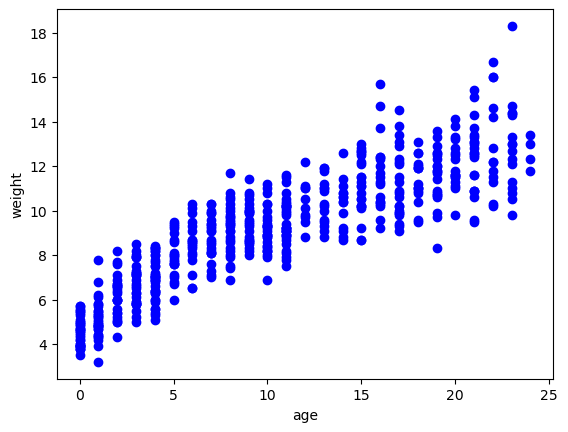

In [3]:
age = dataDF[["age"]]
weight = dataDF[["weight"]]

plt.scatter(age, weight, c = "b")
plt.xlabel("age")
plt.ylabel("weight")
plt.show()

In [4]:
dataDF.corr()

,age,weight
age,1.000000,0.879615
weight,0.879615,1.000000


**Note** As the correlation between age and weight is approximately 0.88 they are strongly positive correlated, meaning that there seems to be a linear relationship between those variables. Thus, it does make sense to create a linear regression model to predict the weight of a children.

The data provided only lists weights for people under 25 ("children"). Thus, it is important to mention, that this correlation might change, once this threshold is disregarded. 

### **1.b)** Building a linear regression model and estimating the true error

As the true error cannot be computed, I can only estimate it. In order to do so, a good approach is creating a linear regression model. Before doing so, however, I first split the entire dataset into two sub-datasets: A train and a test dataset. I then created the linear regression model for the train dataset and looked at the model performance on the test dataset. For that, the Mean Squared Error (MSE) is a good measurement.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

seed = 10

polynomial_features_Q1 = PolynomialFeatures(1) # Up until now, we only care for degree = 1

# Transform the original input data
poly_trans_Q1 = polynomial_features_Q1.fit_transform(age)
input_df_Q1 = pd.DataFrame(poly_trans_Q1)
input_df_Q1["weight"] = weight # after transformation append the target variable y to the DataFrame df

# Split the data into train and test set: 20% of original sample --> test; 80% train
train_set_Q1, test_set_Q1 = train_test_split(input_df_Q1, test_size = 0.2, random_state = seed)

# Order train data by x (just a trick to show properly the polynomial model)
train_set_Q1 = train_set_Q1.sort_values(1) 

# Defining the input dataset for the training and the respective weight values
train_input_df_Q1 = train_set_Q1.iloc[:,0:(len(train_set_Q1.columns)-1)] 
weight_train_Q1 = train_set_Q1[["weight"]]

# Defining the input dataset for the testing and the respective weight values
test_input_df_Q1 = test_set_Q1.iloc[:,0:(len(test_set_Q1.columns)-1)] 
weight_test_Q1 = test_set_Q1[["weight"]]

# Train Model
model_Q1 = linear_model.LinearRegression()
model_Q1.fit(train_input_df_Q1, weight_train_Q1)

# Apply model to Training Set
poly_model_Q1 = model_Q1.predict(train_input_df_Q1)

# Apply model to Test Set
poly_pred_test_Q1 = model_Q1.predict(test_input_df_Q1)

# Compute square error on train data
error_train_Q1 = mean_squared_error(weight_train_Q1, poly_model_Q1)

# Compute square error on test data (unseen)
error_test_Q1 = mean_squared_error(weight_test_Q1, poly_pred_test_Q1)

print("Test Error:", error_test_Q1) 

Test Error: 1.754934812771458


The MSE for the test set, which is also the true error estimation, is 1.71.

Note: It is also interesting to look at the MSE for the train set. As shown below, this is approximately 1.62.

In [6]:
print("Train Error:", error_train_Q1)

Train Error: 1.6022001067894955


In order to retrieve a better estimate, it is, however, a good idea to use a k-fold validation. Here, I will use k = 10. By doing so, I reduce the variance of the performance estimate, which is important for a solid true error estimate.

In [7]:
from sklearn.model_selection import cross_val_score
import sklearn

model_Q1_kfold = linear_model.LinearRegression()

k_fold = cross_val_score(model_Q1_kfold, input_df_Q1.iloc[:, :2], weight, scoring='neg_mean_squared_error', cv=10).mean()
print("K-fold estimate:", k_fold)

K-fold estimate: -1.636245443944943


The most solid true error estimate I can provide is the one retrieved from the k-fold validation, and, therefore, has a value of approximately 1.64.

### **1.c)** Displaying in a visualization the data used to build the model as well as the model obtained.

**Approach 1 (Splitting the dataset into a train- and testset)**

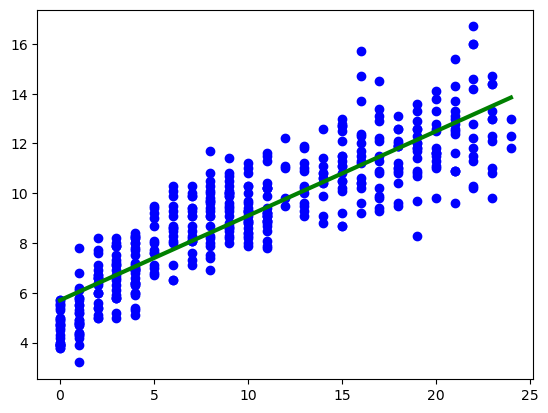

In [8]:
# Plot train set and show the model
plt.scatter(train_input_df_Q1.iloc[:,1], weight_train_Q1, c = "blue") # train set

plt.plot(train_input_df_Q1.iloc[:,1], poly_model_Q1, color = "green", lw = 3) #  model
plt.show()

In order to build the model, I only use the train dataset, here presented by the blue dots. This train dataset is 80% of the orignial dataset. For these datapoints I computed a linear regression (the model), here presented by the green line. As computed in 1b) the MSE of this regression for the train dataset is approximately 1.6.

Note: It is also interesting to look at the model and the test dataset. Here, the computed MSE is approximately 1.75.

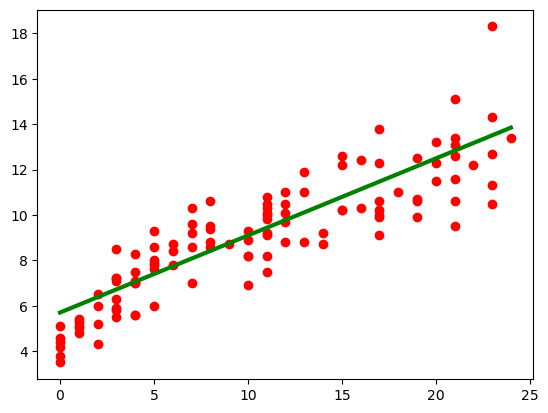

In [9]:
# Plot test set and show the model 
plt.scatter(test_input_df_Q1.iloc[:,1], weight_test_Q1, c = "red") # test set

plt.plot(train_input_df_Q1.iloc[:,1],poly_model_Q1, color = "green", lw = 3) #  model
plt.show()

The equation of the model obtained is:

In [10]:
print("weight ≈",round(model_Q1.coef_[0][1], 5), "* age +", round(model_Q1.intercept_[0], 5))

weight ≈ 0.33934 * age + 5.70009


**Approach 2 (k-fold validation)**

weight ≈ 0.33859 * age + 5.66962


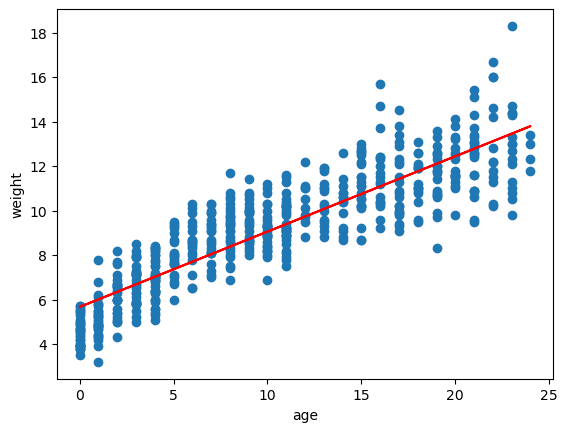

In [11]:
# fitting the linear regression
fitted = model_Q1_kfold.fit(age, weight)

# prediction
xy = fitted.predict(age)

# show equation
print("weight ≈",round(model_Q1_kfold.coef_[0][0], 5), "* age +", round(model_Q1_kfold.intercept_[0], 5))

# plotting the model
plt.scatter(age, weight)
plt.xlabel("age")
plt.ylabel("weight")
plt.plot(age, xy, color = "red")
plt.show()

**Note** Note that the equation retrieved by the k-fold approach is slightly different than the one from the single-split approach. This does make sense, as we split k times, here k = 10, in the k-fold validation process. 

I, personally, would go with the k-fold approach, because, as aforementioned, this approach provides a more robust  estimate of the model's performance by utilizing multiple train-test splits.

## Part 2

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluating polynomial models of degrees 1 through 10. What degree is best in order to have a better model when compared to the model built previously?

As aforementioned, the approach to use in order to get a solid true error estimate is the k-fold validation. I will use the k-fold validation with k = 10 here for each degree (from 1 to 10) and based on those values, I can make a decision about the degree I would choose.

In [12]:
def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(age)
    input_df = pd.DataFrame(poly_trans)
    return input_df

model_Q2a = linear_model.LinearRegression()

df = pd.DataFrame({'degree' : range(1, 11)})

df['test_error'] = df['degree'].apply(lambda deg: cross_val_score(model_Q2a, trans_data(deg), weight, scoring='neg_mean_squared_error', cv=10).mean()) 
df.sort_values('test_error', ascending=False) 

,degree,test_error
9,10,-1.400894
7,8,-1.407284
2,3,-1.409529
3,4,-1.412721
8,9,-1.413353
6,7,-1.417251
4,5,-1.419276
5,6,-1.421643
1,2,-1.443860
0,1,-1.636245


According to the documentation of "neg_mean_squared_error", the best value is 0.0. Thus, as degree 10 gives the value closest to 0.0, this degree is the degree of my choice.

Here, it is important to mention that a regression with degree 10 is prone to overfitting. Overfitting occurs when a model fits the training data too closely, capturing noise and leading to poor generalization on new data. Looking at the sorted dataframe provided above, choosing a degree of 3 is also very reasonable, because the score retrieved from the k-fold validation does not differ too much from the score from degree 10. Nevertheless, the k-fold cross-validation method already serves as a strategy to mitigate overfitting, as it offers a more robust evaluation of a model's performance and diminishes the likelihood of fitting noise in the data. Thus, I the degree of 10 is still the degree of my choice.

### **2.b)** Finding the coefficients of the best curve using the best polynomial degree

**Degree = 10 (degree of my choice):**

In [13]:
# Initializing the degree
polynomial_features_deg10 = PolynomialFeatures(10)

# Transform the original input data
poly_trans_deg10 = polynomial_features_deg10.fit_transform(age)
input_df_deg10 = pd.DataFrame(poly_trans_deg10)

model_deg10 = linear_model.LinearRegression()

fitted_deg10 = model_deg10.fit(input_df_deg10, weight)

# showing coefficients
print(fitted_deg10.coef_[0])
print(fitted_deg10.intercept_[0])

print("\n-------------------------\n")

# printing out the model

equation_str_deg10 = "weight ≈ "

for i, coefficient in enumerate(fitted_deg10.coef_[0]):
    if i == 1:
        equation_str_deg10 += str(round(coefficient, 3)) + " * age" 
    elif i > 1:
        equation_str_deg10 += " + " + str(round(coefficient, 3)) + " * age^" + str(i)

equation_str_deg10 += " + " + str(round(fitted_deg10.intercept_[0], 3))

print("Model:")
print(equation_str_deg10)

[ 0.00000000e+00  3.02568656e-04  1.19871712e+00 -7.28334741e-01
  2.17973206e-01 -3.69359649e-02  3.75055564e-03 -2.32362444e-04
  8.59710585e-06 -1.74429951e-07  1.49262785e-09]
4.56147016013783

-------------------------

Model:
weight ≈ 0.0 * age + 1.199 * age^2 + -0.728 * age^3 + 0.218 * age^4 + -0.037 * age^5 + 0.004 * age^6 + -0.0 * age^7 + 0.0 * age^8 + -0.0 * age^9 + 0.0 * age^10 + 4.561


**Degree = 3 (also very reasonable degree):**

In [14]:
# Initializing the degree
polynomial_features_deg3 = PolynomialFeatures(3)

# Transform the original input data
poly_trans_deg3 = polynomial_features_deg3.fit_transform(age)
input_df_deg3 = pd.DataFrame(poly_trans_deg3)

model_deg3 = linear_model.LinearRegression()

fitted_deg3 = model_deg3.fit(input_df_deg3, weight)

# showing coefficients
print(fitted_deg3.coef_[0])
print(fitted_deg3.intercept_[0])

print("\n-------------------------\n")

# printing out the model

equation_str_deg3 = "weight ≈ "

for i, coefficient in enumerate(fitted_deg3.coef_[0]):
    if i == 1:
        equation_str_deg3 += str(round(coefficient, 3)) + " * age" 
    elif i > 1:
        equation_str_deg3 += " + " + str(round(coefficient, 3)) + " * age^" + str(i)

equation_str_deg3 += " + " + str(round(fitted_deg3.intercept_[0], 3))

print("Model:")
print(equation_str_deg3)

[ 0.          0.80023602 -0.03769543  0.00081819]
4.561069241606085

-------------------------

Model:
weight ≈ 0.8 * age + -0.038 * age^2 + 0.001 * age^3 + 4.561
